![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture 12 - Principal Component Analysis</center>
### <center> PCA</center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/12_PCA/MainPCA1.ipynb)

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size' : 16})

# np.random.seed(2)

### Get the face dataset:

In [2]:
from sklearn.datasets import fetch_olivetti_faces

mX, _ = fetch_olivetti_faces(return_X_y=True)
N, D  = mX.shape
vSize = (64, 64)
mX.shape

(400, 4096)

### Plot some examples:

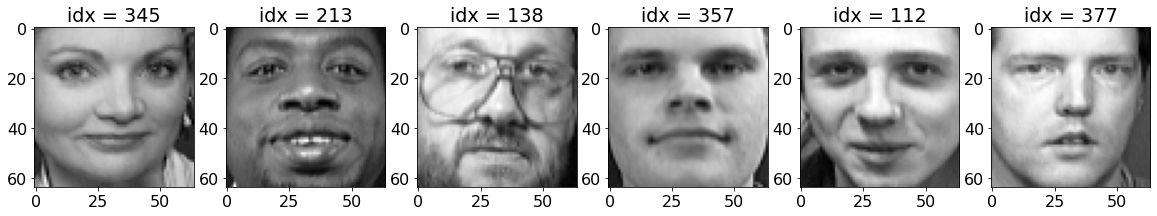

In [3]:
K = 6
_, ax = plt.subplots(1, K, figsize=(20, 6))
for kk in range(K):
    idx = np.random.choice(N)
    mI  = np.reshape(mX[idx,:], vSize)
    
    ax[kk].imshow(mI, cmap='gray')
    ax[kk].set_title('idx = ' + str(idx))
plt.show()

### Compute mean face:

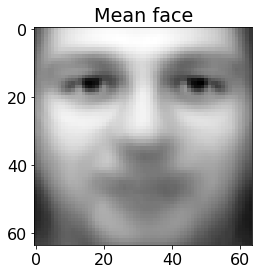

In [4]:
vMean = np.mean(mX, 0)

mI = np.reshape(vMean, vSize)
plt.figure()
plt.imshow(mI, cmap='gray')
plt.title('Mean face')
plt.show()

### Compute eigenvectors and eigenvalues:
$$\boldsymbol{X}=\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^{T}$$
Using SVD

In [5]:
mCenteredX = mX - vMean
mU, vS, _  = np.linalg.svd(mCenteredX.T, full_matrices=False)
mU.shape

(4096, 400)

### Plot some eigenvectors (as images):

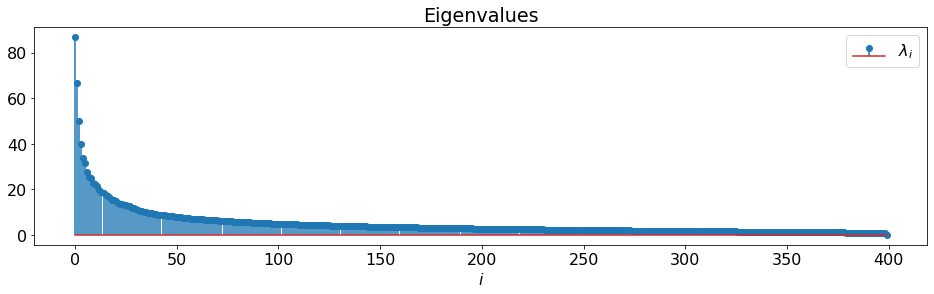

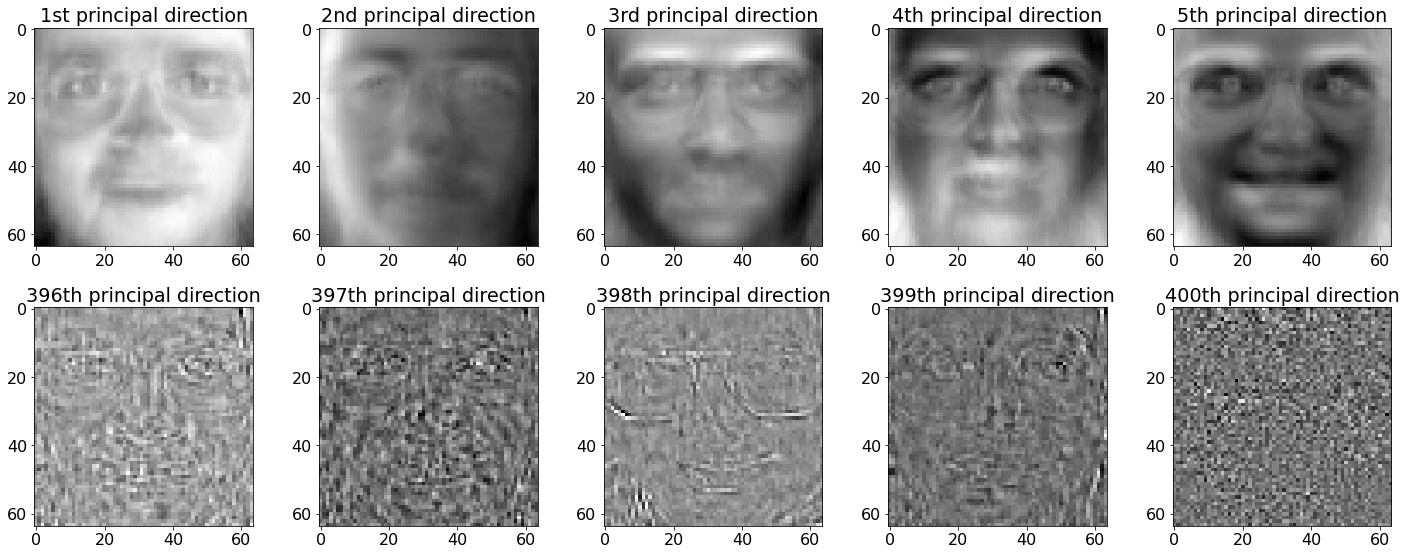

In [6]:
import math
ordinal = lambda n: "%d%s" % (n,"tsnrhtdd"[(math.floor(n/10)%10!=1)*(n%10<4)*n%10::4])

plt.figure(figsize=(16, 4))
plt.stem(vS, use_line_collection=True, label='$\lambda_i$')
plt.title('Eigenvalues')
plt.xlabel('$i$')
plt.legend()

fig, _ = plt.subplots(2, 5, figsize=(20,8))
vIdx   = list(range(5)) + list(range(395, 400))
for kk, ax in zip(range(10), fig.axes):
    idx = vIdx[kk]
    mI  = np.reshape(mU.T[idx,:], vSize)
    ax.imshow(mI, cmap='gray')
    ax.set_title(ordinal(idx+1) + ' principal direction')
    
plt.tight_layout()
plt.show()

### Reconstruction plot:

In [7]:
idx        = 360
# idx        = 2
vX         = mX[idx,:]
vCenteredX = mCenteredX[idx,:]
def PlotReconstruction(d):
    
    if d > 0:
        mUd    = mU[:,:d]
        vCoeff = mUd.T @ vCenteredX.T
        vHatX  = (mUd @ vCoeff) + vMean
    else:
        vCoeff = [0]
        vHatX  = vMean
        
    mI   = np.reshape(vX,      vSize)
    mRec = np.reshape(vHatX.T, vSize)

    plt.figure(figsize=(12,8))
    plt.subplot(2,1,1)
    plt.stem(vCoeff, use_line_collection=True, label='coefficients')
    plt.xlabel('idx')
    plt.legend()
    
    plt.subplot(2,2,3)
    plt.imshow(mI,   cmap='gray')
    plt.title('Original')
    plt.subplot(2,2,4)
    plt.imshow(mRec, cmap='gray')
    plt.title('Reconstruction, d = ' + str(d))
    plt.tight_layout()

In [8]:
from ipywidgets import interact, IntSlider, Layout

dSlider = IntSlider(min=0, max=400, step=1, value=0, layout=Layout(width='80%'))
interact(PlotReconstruction, d=dSlider)
plt.show()

interactive(children=(IntSlider(value=0, description='d', layout=Layout(width='80%'), max=400), Output()), _do…

### Generate new faces:

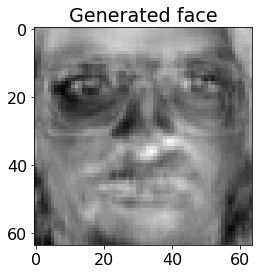

In [9]:
d      = 100
vCoeff = np.random.randn(d) * vS[:d]
vRandX = mU[:,:d] @ vCoeff + vMean
mI     = np.reshape(vRandX, vSize)
plt.figure()
plt.imshow(mI, cmap='gray')
plt.title('Generated face')
plt.show()

### Sk-learn PCA

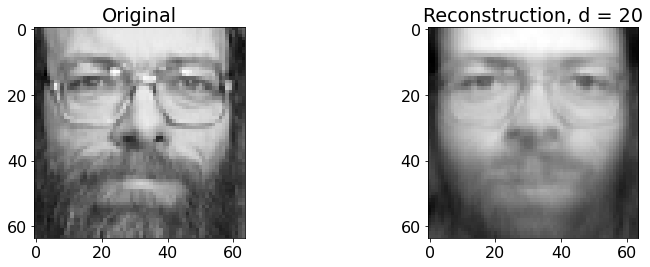

In [10]:
from sklearn.decomposition import PCA

d     = 20
oPCA  = PCA(n_components=d).fit(mX)
vZ    = oPCA.transform(mX[idx:idx+1,:])
vHatX = oPCA.inverse_transform(vZ)

mI   = np.reshape(mX[idx,:], vSize)
mRec = np.reshape(vHatX.T,   vSize)

plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.imshow(mI, cmap='gray')
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(mRec, cmap='gray')
plt.title('Reconstruction, d = ' + str(d))
plt.tight_layout()

### Exercise
* Use the iris data: `load_iris`
* Apply PCA to reduce the dimensionality from $4$ to $2$.
* Plot a scatter plot of the low dimensional features (after the PCA) and color them according to the labels.


In [11]:
from sklearn import datasets

mX, vY = datasets.load_iris(return_X_y=True)
mX.shape, vY.shape

((150, 4), (150,))

In [12]:
d     = ???
...
mZ    = ???

plt.figure(figsize=(8, 4))
plt.scatter(mZ[:,0], mZ[:,1], c=vY, s=100, edgecolor='k')
plt.show()

SyntaxError: invalid syntax (<ipython-input-12-43cc07a41f39>, line 1)